In [117]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N = 30  # iterations

## Percentage of Evacuated

In [449]:
total_dfs = []
cars_dfs = []
peds_dfs = []

for i in range(1, N + 1):
    data = pd.read_csv(f"./data/evacuated/evacuated-{50}-{50}-{i}.csv", skiprows=18)

    tot_evac = data[['x', 'y']].copy()
    tot_evac["i"] = i
    #tot_evac["cat"] = "evacuated"

    cars_evac = data[['x.1', 'y.1']].copy()
    cars_evac["i"] = i
    #cars_evac["cat"] = "cars"
    #cars_evac = cars_evac.rename(columns={'x.1':'x', 'y.1':'y'})

    peds_evac = data[['x.2', 'y.2']].copy()
    peds_evac["i"] = i
    #peds_evac["cat"] = "pedestrians"
    #peds_evac = peds_evac.rename(columns={'x.2':'x', 'y.2':'y'})

    # xx = pd.concat([tot_evac, cars_evac, peds_evac])

    #total_dfs.append(xx)

    total_dfs.append(tot_evac)
    cars_dfs.append(cars_evac)
    peds_dfs.append(peds_evac)

t_df = pd.concat(total_dfs).reset_index() # drop=True
c_df = pd.concat(cars_dfs).reset_index()
p_df = pd.concat(peds_dfs).reset_index()

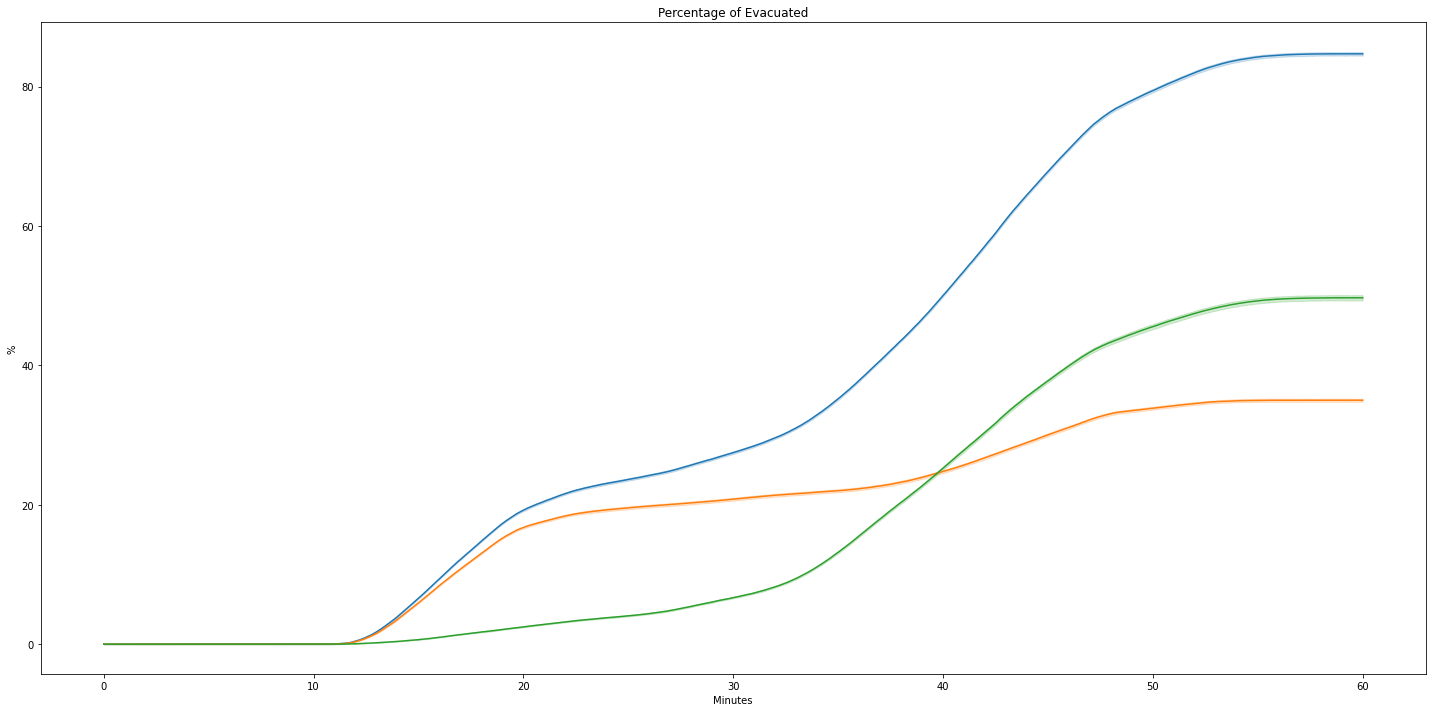

In [458]:
fig = plt.figure(figsize=(20, 10))
ax = sns.lineplot(x=t_df["x"], y=t_df["y"]) #  hue=t_df["cat"]
ax.set_title("Percentage of Evacuated")
ax.set_xlabel("Minutes")
ax.set_ylabel("%")
sns.lineplot(x=c_df["x.1"], y=c_df["y.1"])
sns.lineplot(x=p_df["x.2"], y=p_df["y.2"])
fig.tight_layout()

### Compare between configurations group by cars/pedestrias

## Evacuation Times

In [480]:
# averaged times
df = pd.DataFrame({"y" : [0] * 60}, index=range(1, 61))

for i in range(1, N + 1):
    data = pd.read_csv(f"./data/times/times-{50}-{50}-{i}.csv", skiprows=18)
    data = data[['x', 'y']].set_index("x")
    data = data.reindex(range(1, 61), fill_value=0)
    df = df + data

df = df / N
df = df.reset_index()
df.columns=["x", "y"]

In [504]:
# confidence interval
df = []
for i in range(1, N + 1):
    data = pd.read_csv(f"./data/times/times-{50}-{50}-{i}.csv", skiprows=18)
    data = data[['x', 'y']].set_index("x")
    data['i'] = i
    data = data.reindex(range(1, 61), fill_value=0)
    df.append(data)
    
df = pd.concat(df).reset_index()

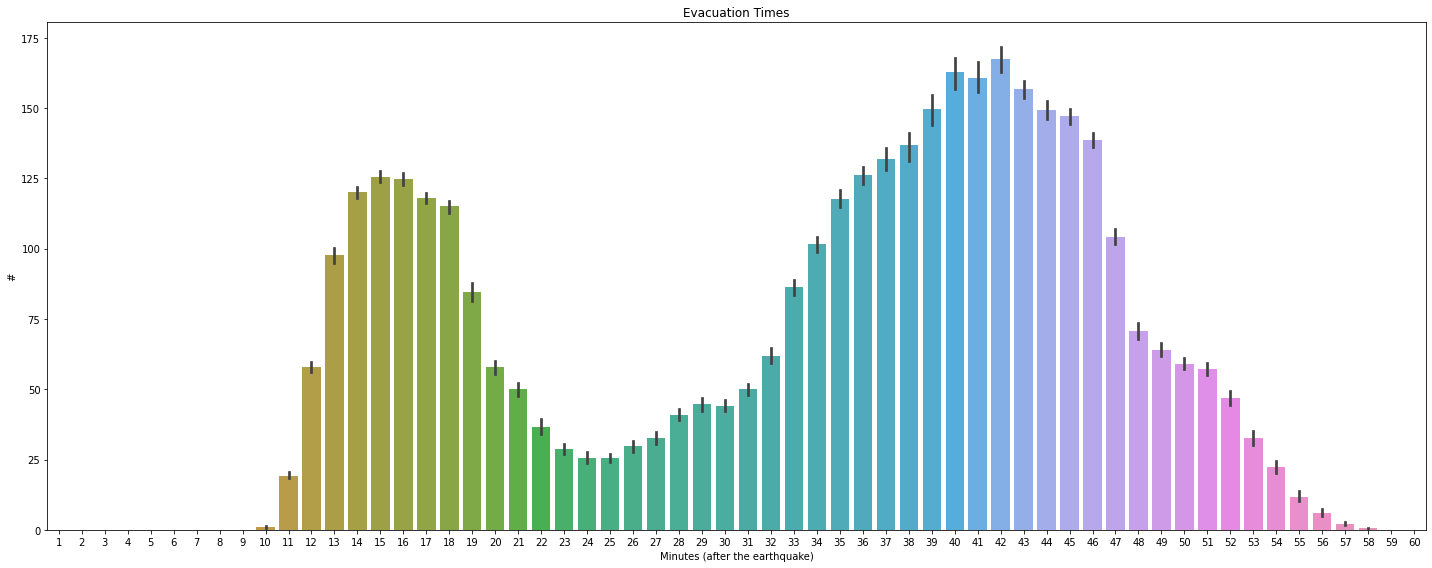

In [505]:
fig = plt.figure(figsize=(20, 8))
ax = sns.barplot(x=df['x'], y=df['y'])
ax.set_title("Evacuation Times")
ax.set_xlabel("Minutes (after the earthquake)")
ax.set_ylabel("#")
fig.tight_layout()

## Network Data

In [503]:
data = pd.read_csv(f"./data/roads/roads-{50}-{50}-{1}.csv")
data = data.set_index(["end1", "end2"])
data

,,traffic,crowd,minute
end1,end2,,,
199,465,0,0,20
342,164,0,0,20
251,315,0,0,20
190,213,0,0,20
87,86,0,0,20
...,...,...,...,...
12,11,0,0,60
297,441,0,0,60
554,553,0,0,60
